# Loan Application status Prediction

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

Loading the dataset from github

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we have 614 rows and 13 columns in our dataframe

Our target variable or dependent variable is Loan_status which is binary in nature hence it is a binary classification problem

# EDA

Let us have a look at our columns

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

we can drop the Loan_ID column as i feel it is not useful in prediction of loan status

In [4]:
df.drop("Loan_ID", axis=1, inplace=True)

we have 12 columns in our dataframe now

# Checking Null Values in our Data Frame

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we see that there are null values present in columns gender,, married, Dependents, Self_Employed,LoanAmount, Loan_Amunt_Team, Credit_History which will have to be taken care of later

In [6]:
df[df['Gender'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [7]:
df[df['Married'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [8]:
df[df['Dependents'].isna()]      

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [9]:
df[df['Self_Employed'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [10]:
df[df['LoanAmount'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [11]:
df[df['Loan_Amount_Term'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [12]:
df[df['Credit_History'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


# Checking Unique Values

In [13]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

we can see that our Loan_Status has 2 unique values which proves our target column has binary data and hence it becomes a classification problem

# DataFrame Description

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the describe function only describes the numerical values

we can confirm from count again that some columns have missing data

We can observe that the difference between the 25% quartile and max is a lot and we can say that a lot of outliers are present

similarly for 50% and 75% quartiles there are outliers present

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


we observe that some of the columns are of object datatype, ehich will nedd to be taken care of since the machine understands only numerical values

# Filling Missing Data

filling continous data columns with the mean value of that column

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

filling categorical data columns with the mode value of that column

In [17]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

we have successfully filled the missing numerical values with intt and the missing categorcial values with mode

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we can confimr that all values have been filled successfuly

# Visualization

let us make 2 different list for object and int datatype

In [19]:
obj_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_datatype.append(x)
print(f"Object Data Type Columns are:\n", obj_datatype)

Object Data Type Columns are:
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [20]:
int_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        int_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", int_datatype)


Number Data Type Columns are:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


pie chart

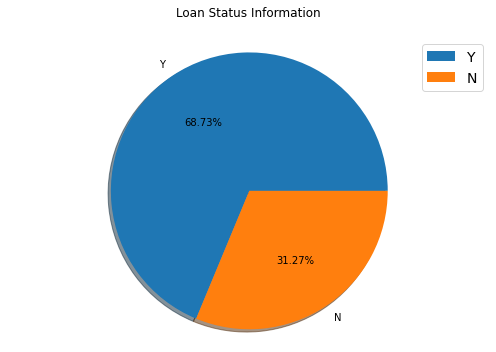

In [21]:
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we have the loan status as 67.73% as approved and 31.27% as not approved. Another thng we observe is that the data is imbalanced, which will be taken care of later using SMOTE

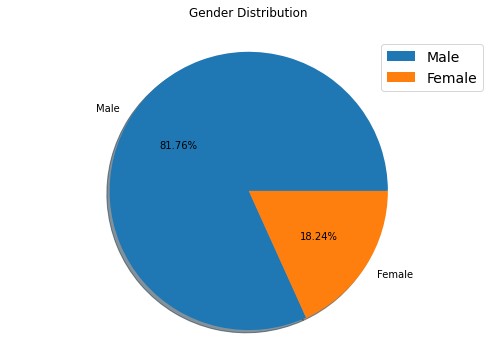

In [22]:
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

We can see that loan application consistes of almost 81.76% of and females consist of 18.24%

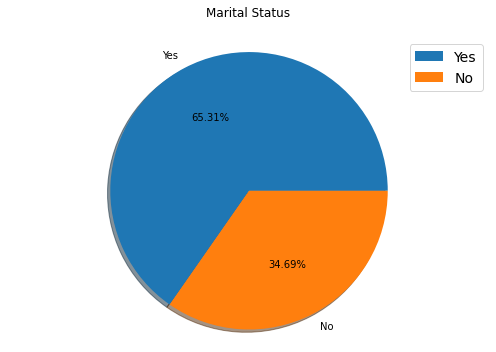

In [23]:
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we see that 65.31% percent of loan application consist of males while the remaining are females

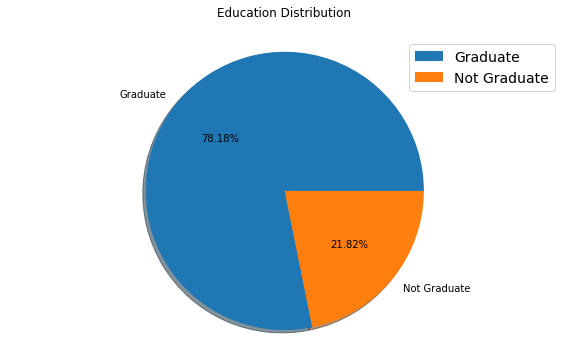

In [24]:
plt.figure(figsize=(8,5))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we see that 78.18% of applicnats are graduates while the remaining 21.82% are not graduates

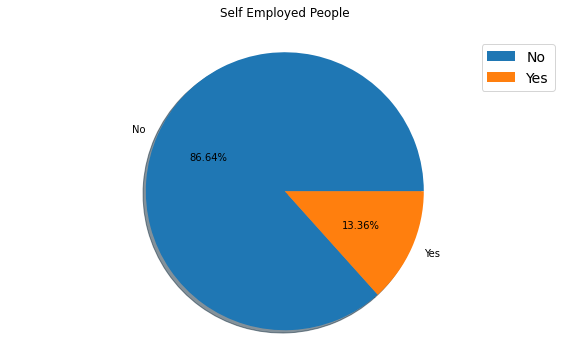

In [25]:
plt.figure(figsize=(8,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we see that 86.64% of applicants are not self employed people , while the remaining 13.36% are self employed people 

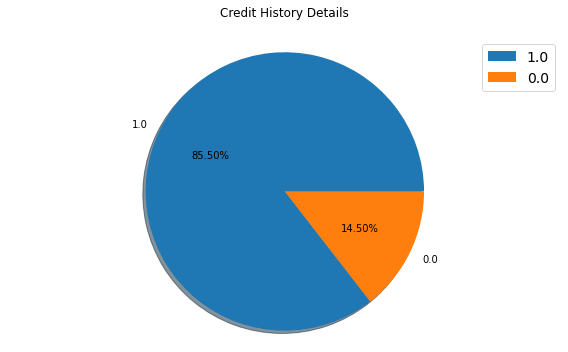

In [26]:
plt.figure(figsize=(8,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we observe that For 85.50% of people we have the credit history information available while 14.50% people do not have any credit history.

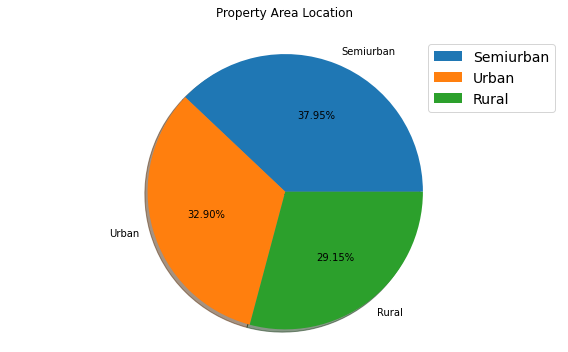

In [27]:
plt.figure(figsize=(8,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we observe that 37.95% of property area location is occupied by semiurban , 32.90% by urban and 29.15 % with rural

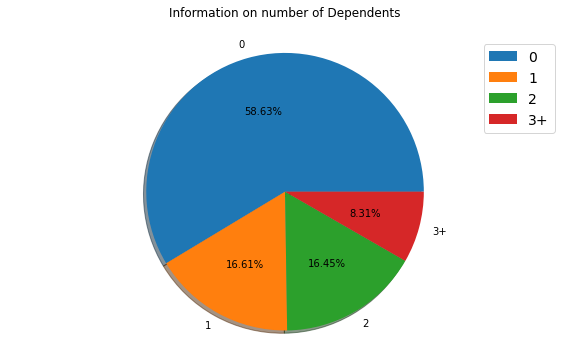

In [28]:
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

we observe that 58.63% percent of apllications have 0 dependencies, 16.61% percent application with 1 dependencies, 1645% with 2 dependencies and 8.31% with 3+ dependencies

Line plot

In [29]:
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'

('ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

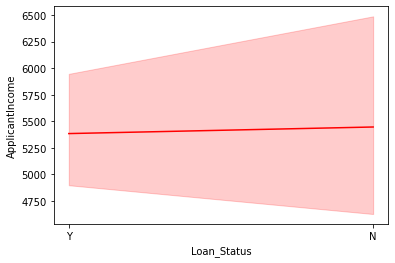

In [30]:
sns.lineplot(x = "Loan_Status", y = "ApplicantIncome", data = df,color='red')

we observe that the line is constant for loan status at around5350 aplicantincome 

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

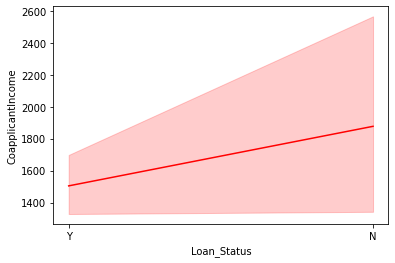

In [31]:
sns.lineplot(x = "Loan_Status", y = 'CoapplicantIncome', data = df,color='red')

we observe that the loan status increases with increase in Coapplicantincome

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

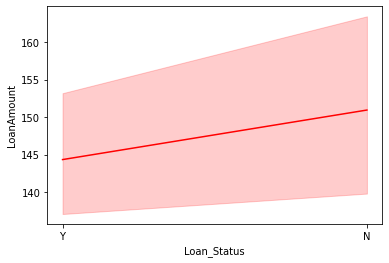

In [32]:
sns.lineplot(x = "Loan_Status", y = 'LoanAmount', data = df,color='red')

we observe that the loan status increases with increase in loan amount

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

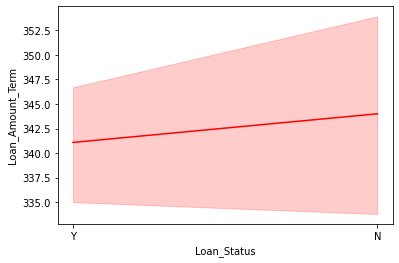

In [33]:
sns.lineplot(x = "Loan_Status", y = 'Loan_Amount_Term', data = df,color='red')

we observe that the loan statuts increases slightly ieth slight increase in Loan Amount Term

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

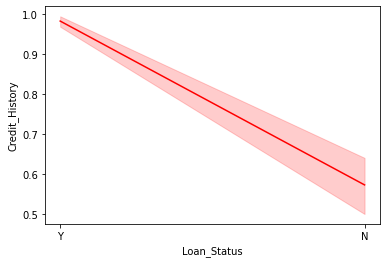

In [34]:
sns.lineplot(x = "Loan_Status", y = 'Credit_History', data = df,color='red')

the loan status decreases drastically with increase in credit history

PairPLot

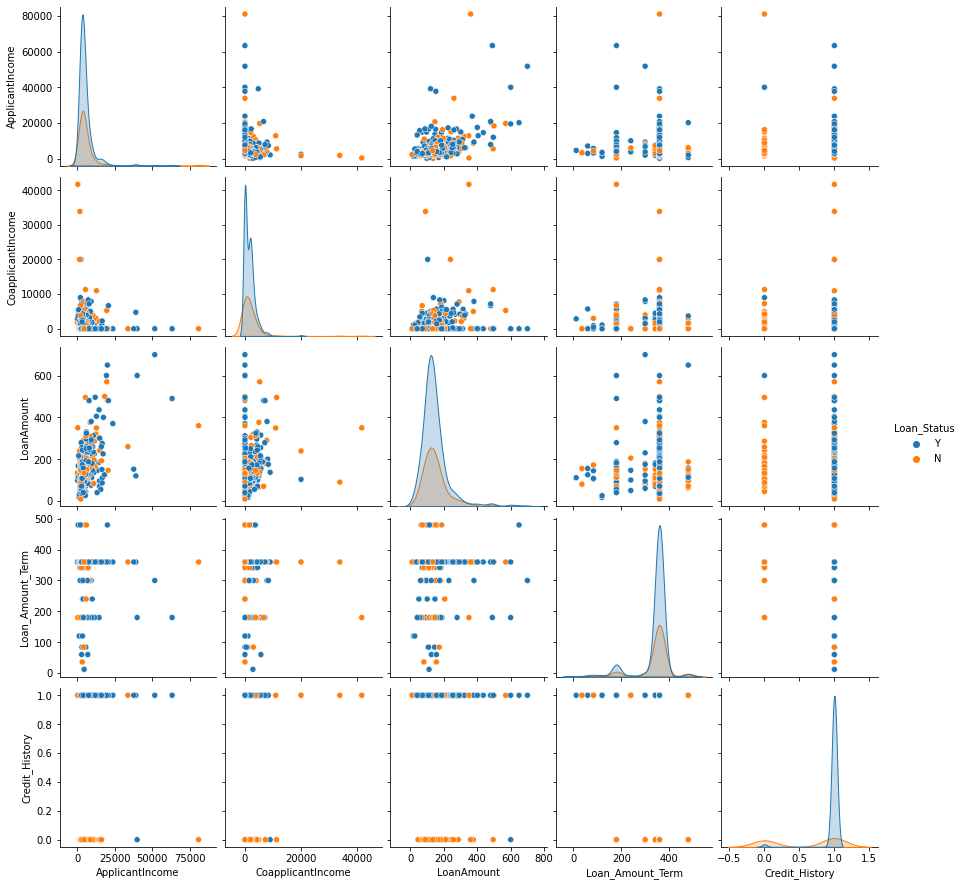

In [35]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')

# Encoding

Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


Ordinal Encoding

In [37]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


Box PLot

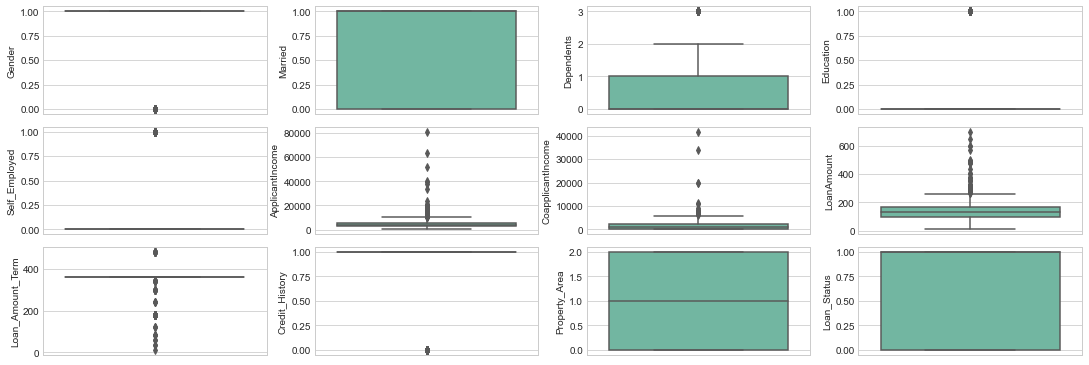

In [38]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that outliers are present in most of the columns

Normal Distribution Curve

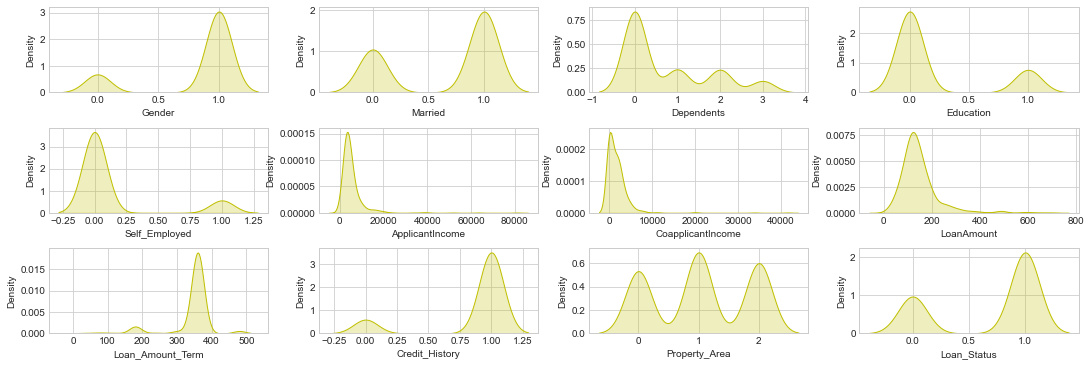

In [39]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can see that skewness is present in some of the columns

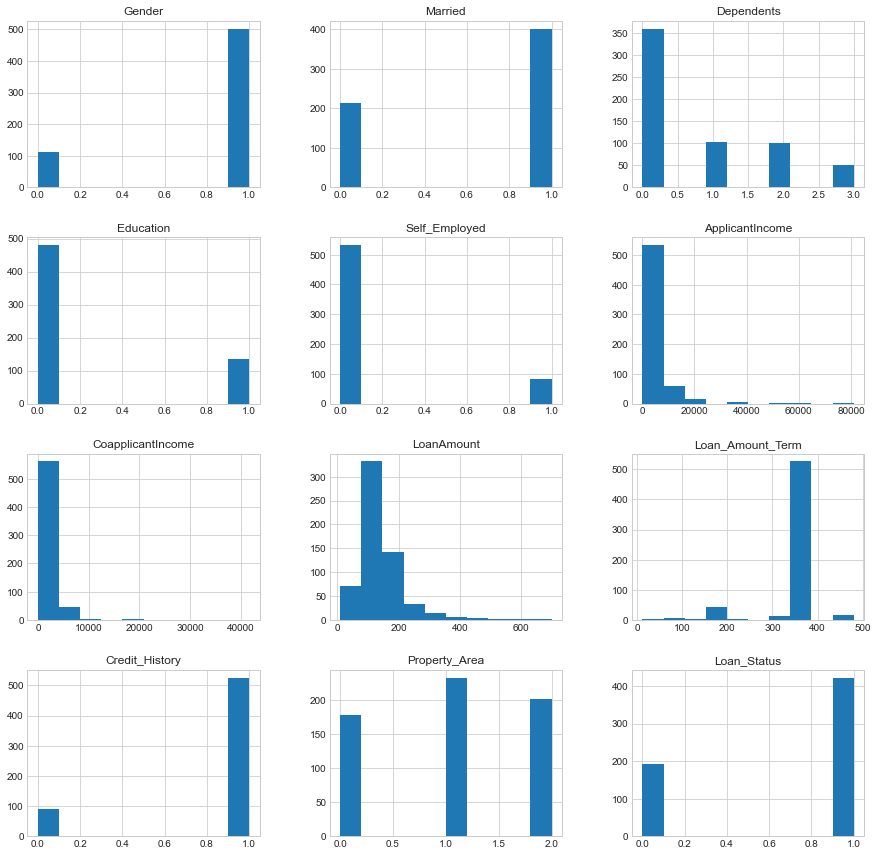

In [40]:
df.hist(figsize=(15,15))
plt.show()

# Correlation

In [41]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

i observe that the only high correlation values is of Credit_History with a values of 0.54

A positive correlation means that the independent and dependent variable move in the same direction

A negative correlation indicates that the independet and dependent variables move in the opposite direction

Now let us plot a heat map to understand the correlation better

<AxesSubplot:>

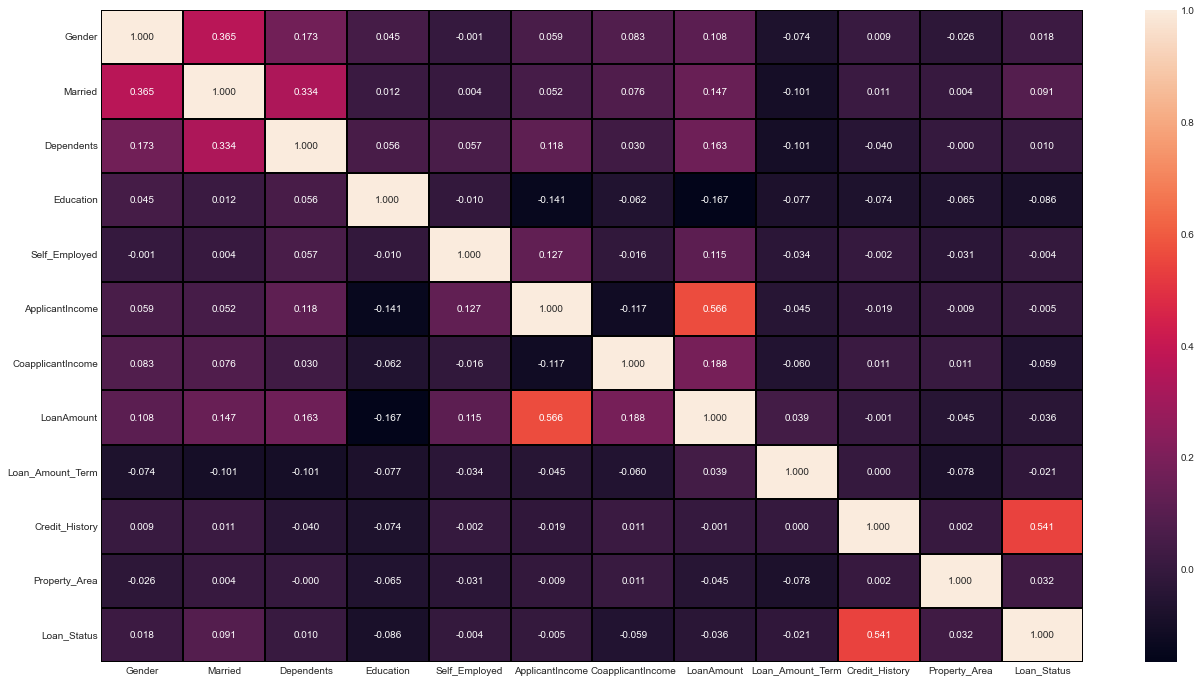

In [42]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.3f')

It is easier for us to indentify the correlation between variables with the help of a heat map. A zero correlation indicates there is no relationship between variables.

There is only one positive correlation value which is high, 0.541 of Credit_History column

we dont have to worry about multivollinearity

# Correlation Bar Plot comparing features with our label

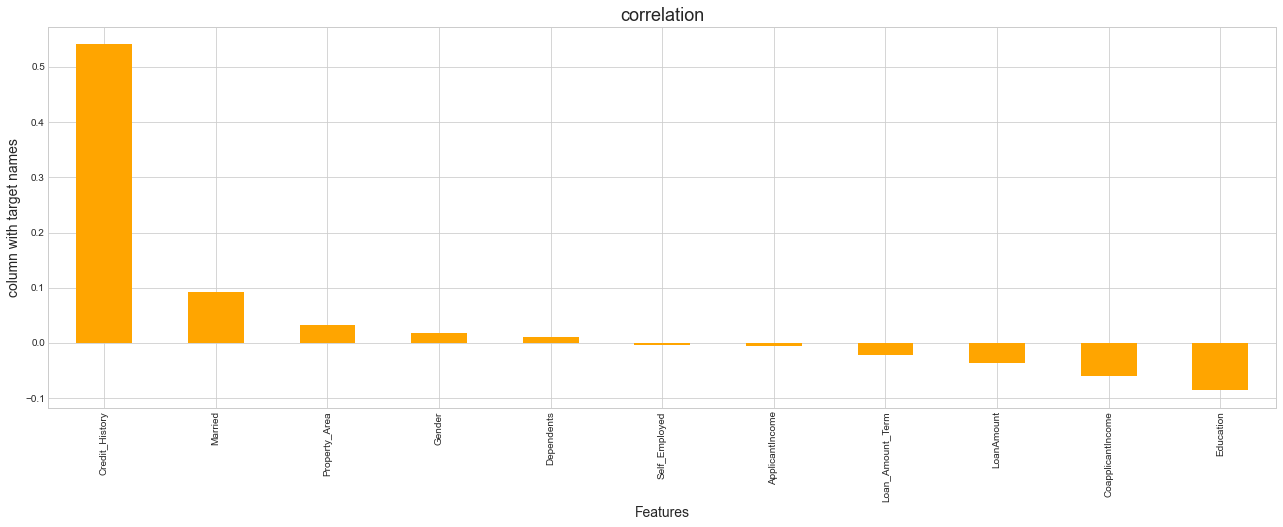

In [43]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='orange')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

we can clearly see the columns that are positively and negatively correlated with capacity_mw, there are more positively correlated variables

# CHECKING OUTLIERS

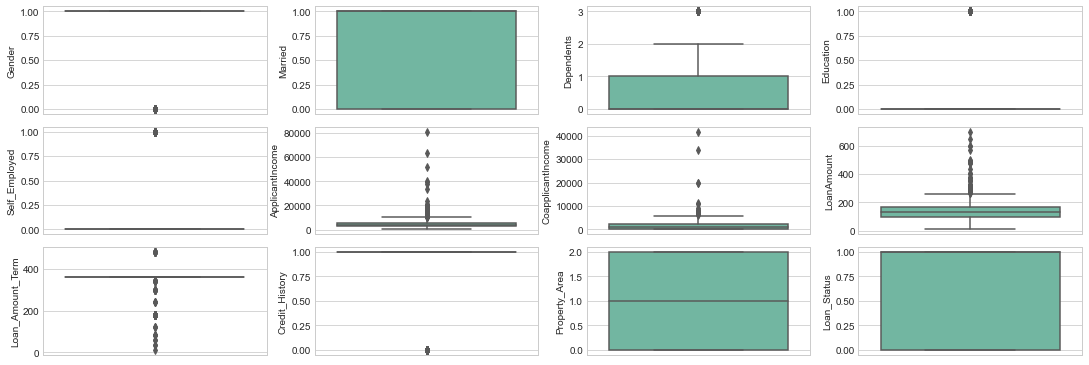

In [44]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

we can observe some outliers are present

# Removing Outliers

In [45]:
df.shape

(614, 12)

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

Setting the value of threshold as 3

In [47]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1


# Percentage Data Loss

In [48]:
Data_loss=((18249-17823)/18249)*100
print(Data_loss,'%')

2.3343744862732203 %


The percentage data loss is very less therefore we can proceed with our new dataframe

# Handling Skweness

In [49]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

if we take the range of skewness as (-1,1) then the columns Gender,Dependents,Education,Self_Employed,ApplicationIncome, LoanAmount, Loan_Term_Amount, Credit_History are highly skewed

# Applying Log Transform

In [50]:
for col in df_new_z:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We have been successful in removing the skewness upto some extent which can be seen in our plots below

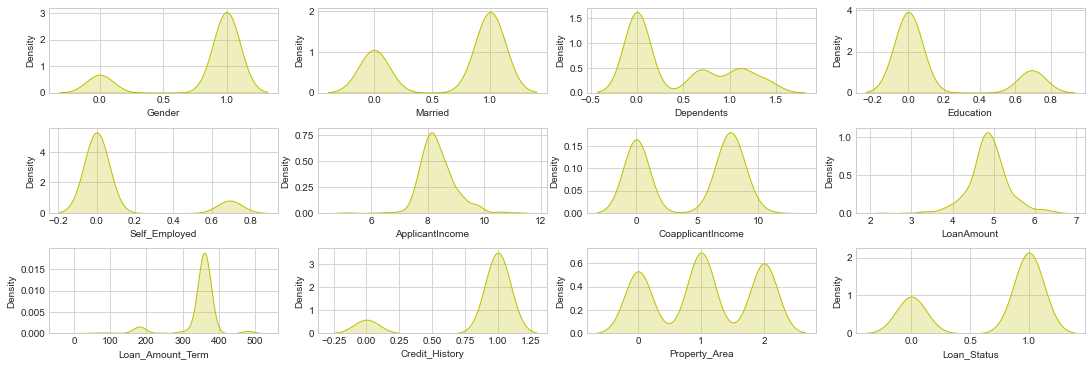

In [51]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

# Separating the columns into 'features' and 'targets' as 'x1' and 'y1'

In [52]:
x1=df_new_z.drop('Loan_Status',axis=1)
y1=df_new_z['Loan_Status']
print(x1.shape)
print(y1.shape)

(577, 11)
(577,)


In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

# Applying SMOTE

In [54]:
y1.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

we can see that our data is imbalanced

In [55]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x1,y1=oversample.fit_resample(x1,y1)

In [56]:
y1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Feature Scaling

i scaling my data to avoid any biasness towards a column so that our data is standardized

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)
x1

array([[ 0.499955  , -1.39158383, -0.74595358, ...,  0.24853156,
         0.61433989,  1.2892449 ],
       [ 0.499955  ,  0.7893831 ,  0.29655269, ...,  0.24853156,
         0.61433989, -1.31240164],
       [ 0.499955  ,  0.7893831 , -0.74595358, ...,  0.24853156,
         0.61433989,  1.2892449 ],
       ...,
       [ 0.499955  ,  0.28193092, -0.74595358, ...,  0.24853156,
        -1.27227156,  0.68391193],
       [ 0.499955  ,  0.7893831 , -0.74595358, ..., -2.21290274,
        -1.84434007, -1.31240164],
       [-0.47087259, -0.00262522, -0.74595358, ...,  0.24853156,
        -0.95148152,  1.2892449 ]])

# Power Transform

In [58]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')
x1

array([[ 0.52662105, -1.33142833, -0.8472865 , ...,  0.13691653,
         0.65798539,  1.29244774],
       [ 0.52662105,  0.81829357,  0.79403842, ...,  0.13691653,
         0.65798539, -1.30908619],
       [ 0.52662105,  0.81829357, -0.8472865 , ...,  0.13691653,
         0.65798539,  1.29244774],
       ...,
       [ 0.52662105, -0.09548192, -0.8472865 , ...,  0.13691653,
        -1.55104555,  0.68167325],
       [ 0.52662105,  0.81829357, -0.8472865 , ..., -1.92631347,
        -1.64586502, -1.30908619],
       [-1.70537936, -0.45616015, -0.8472865 , ...,  0.13691653,
        -1.47012626,  1.29244774]])

# Finding the best accuracy at random state

In [59]:
maxAccu=0
maxRS=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy is", maxAccu,"at Random State", maxRS)

Best accuracy is 84.03041825095056 at Random State 1


# Logistic Regression

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

lr=LogisticRegression()
#training the model
lr.fit(x_train,y_train)
    
#Predicting y_test
pred=lr.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(lr,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.98859315589354

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.59      0.73       117
           1       0.75      0.99      0.85       146

    accuracy                           0.81       263
   macro avg       0.86      0.79      0.79       263
weighted avg       0.85      0.81      0.80       263

Cross Validation Score: 79.28380503144655

Accuracy Score - Cross Validation Score is 1.704788124446992


# Support vector classifier

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

svc=SVC()
#training the model
svc.fit(x_train,y_train)
    
#Predicting y_test
pred=svc.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(svc,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  82.12927756653993

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.62      0.75       117
           1       0.76      0.99      0.86       146

    accuracy                           0.82       263
   macro avg       0.87      0.80      0.81       263
weighted avg       0.86      0.82      0.81       263

Cross Validation Score: 80.41588050314465

Accuracy Score - Cross Validation Score is 1.713397063395277


# Decision Tree Classifier

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

dt=DecisionTreeClassifier()
#training the model
dt.fit(x_train,y_train)
    
#Predicting y_test
pred=dt.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(dt,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.98859315589354

Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       117
           1       0.85      0.80      0.82       146

    accuracy                           0.81       263
   macro avg       0.81      0.81      0.81       263
weighted avg       0.81      0.81      0.81       263

Cross Validation Score: 78.90487421383648

Accuracy Score - Cross Validation Score is 2.083718942057061


# KNeighborsClassifier

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

kn=KNeighborsClassifier()
#training the model
kn.fit(x_train,y_train)
    
#Predicting y_test
pred=kn.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(kn,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  80.6083650190114

Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       117
           1       0.80      0.86      0.83       146

    accuracy                           0.81       263
   macro avg       0.81      0.80      0.80       263
weighted avg       0.81      0.81      0.80       263

Cross Validation Score: 76.76729559748428

Accuracy Score - Cross Validation Score is 3.8410694215271235


# Random Forest Classifier

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

rf=RandomForestClassifier()
#training the model
rf.fit(x_train,y_train)
    
#Predicting y_test
pred=rf.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(rf,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  87.07224334600761

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       117
           1       0.84      0.95      0.89       146

    accuracy                           0.87       263
   macro avg       0.88      0.86      0.87       263
weighted avg       0.88      0.87      0.87       263

Cross Validation Score: 84.81446540880502

Accuracy Score - Cross Validation Score is 2.25777793720259


# Extra Trees Classifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=86)

et=ExtraTreesClassifier()
#training the model
et.fit(x_train,y_train)
    
#Predicting y_test
pred=et.predict(x_test)
    
#accuracy score
acc_score=(accuracy_score(y_test,pred))*100
print('Accuracy Score: ',acc_score)
    
#classification report
class_report=classification_report(y_test,pred)
print('\nClassification Report \n',class_report)
    
#cross Validation score
cv_score=(cross_val_score(et,x1,y1,cv=5).mean())*100
print('Cross Validation Score:',cv_score)
    
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score:  84.4106463878327

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       117
           1       0.84      0.88      0.86       146

    accuracy                           0.84       263
   macro avg       0.84      0.84      0.84       263
weighted avg       0.84      0.84      0.84       263

Cross Validation Score: 83.68317610062894

Accuracy Score - Cross Validation Score is 0.727470287203758


# I will choose decision tree classifier for hyperparameter tuning as it is giving me the least value of accuracy score-cross validation

# Hyperparametertuning on decision tree classifier

the parameter have been chosen after referring from the sklearn webpage

In [66]:
from sklearn.model_selection import GridSearchCV
fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ['best','random'],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

In [67]:
GSCV = GridSearchCV(dt, fmod_param, cv=5)

In [68]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [42, 45, 111],
                         'splitter': ['best', 'random']})

In [69]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 4,
 'random_state': 45,
 'splitter': 'random'}

In [70]:
GSCV.best_score_

0.7806030682419326

In [71]:
Final_Model = DecisionTreeClassifier(criterion='entropy',max_depth=30,min_samples_split=3,random_state=111,splitter='random')
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
hcvs=cross_val_score(rf,x1,y1,cv=5)

Accuracy score for the Best Model is: 78.70722433460075


# AOC ROC Curve

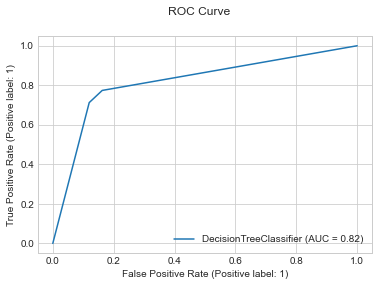

In [72]:
from sklearn import metrics
curve = metrics.plot_roc_curve(Final_Model, x_test, y_test)
curve.figure_.suptitle("ROC Curve")
plt.show()

# The Auc of my final model,DecisionTreeClassifier, is 79%

# Confusion Matrix

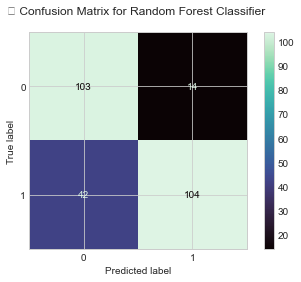

In [73]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Random Forest Classifier \n')
plt.show()

From the confusion matrix we can see that our TP=101,FP=30,FP=29,TN=103

that means that are 101 postive values were correctly classified

103 negative values were correctly classified

30 postive values were incorrectly classified

29 negative values were incorrectly classifed

# Model Saving

In [74]:
import pickle
filename='Loan_Application_status_E6.pkl'
pickle.dump(RandomForestClassifier(),open(filename,'wb'))